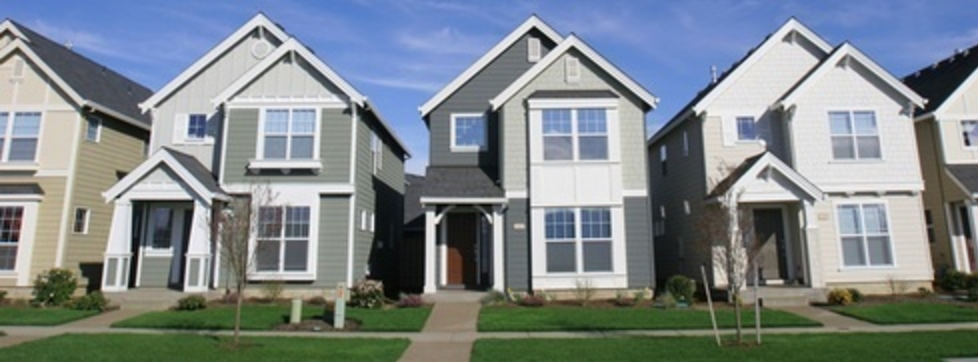

# Ames Housing Saleprice

## Problem Statement

Create a regression model where we are able to see what features affects the price of the house at sales the most.

## Executive Summary

### Contents:
- [7. Model_Benchmarks](#7.-Model-Benchmarks)
- [8. Model_Tuning](#8.-Model-Tuning)


Links:
[Kaggle challenge link](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)

# 7. Model Benchmarks

In [1]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
plt.style.use('ggplot')
from IPython.display import display
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [2]:
# Importing cleaned dataset for Pre Processing
df_train= pd.read_csv('../datasets/train_preprocess.csv')

df_train.shape

(1910, 149)

## 7.1 Train Split Test

In [3]:
col_keys = df_train.drop(columns = ['Id','SalePrice']).keys()
col_keys

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Exter Qual', 'Bsmt Qual', 'Central Air', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual',
       ...
       'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Garage Type_2Types', 'Garage Type_Attchd', 'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd'], dtype='object', length=147)

In [4]:
y = df_train['SalePrice']
X = df_train[col_keys]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.2)

In [6]:
print('X_train shape: ' + str(X_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: ' + str(y_test.shape))

X_train shape: (1528, 147)
X_test shape: (382, 147)
y_train shape: (1528,)
y_test shape: (382,)


## 7.1.1 Linear

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
print("Train Score(Lr): " + str(lr.score(X_train,y_train)))
print("Test Score(Lr): " + str(lr.score(X_test,y_test)))
print('Test Data Estimated score(Lr) ' + str(cross_val_score(lr, X_train, y_train, cv = 5).mean()))

Train Score(Lr): 0.9031778260423899
Test Score(Lr): 0.8746906264137633
Test Data Estimated score(Lr) -2.3107040663945649e+21


In [10]:
print("Train MSE(Lr) " + str(mean_squared_error(y_train, lr.predict(X_train))))
print('Test MSE(Lr) ' + str(mean_squared_error(y_test, lr.predict(X_test))))
                              
print('Test Data Estimated MSE(Lr) ' + str(-cross_val_score(lr, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean()))

Train MSE(Lr) 492494432.02394813
Test MSE(Lr) 761507092.9795002
Test Data Estimated MSE(Lr) 1.220864857779322e+31


In [11]:
def model_evaluation_plots(model, X_train, y_train, X_test, y_test):
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)
    
    plt.figure(figsize=(12,6))
    # Residuals
    plt.subplot(121)
    plt.scatter(y_train_preds, y_train_preds - y_train, c='red', marker='o', label='Training data')
    plt.scatter(y_test_preds, y_test_preds - y_test, c='green', marker='s', label='Validation data')
    plt.title('Residuals')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max(), color='blue')

    # Predictions
    plt.subplot(122)
    plt.scatter(y_train_preds, y_train, c='red', marker='o', label='Training data')
    plt.scatter(y_test_preds, y_test, c='green', marker='s', label='Validation data')
    plt.title('Predictions')
    plt.xlabel('Predicted values')
    plt.ylabel('Real values')
    plt.legend(loc='upper left')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], c='blue')
    plt.tight_layout()
    plt.show()

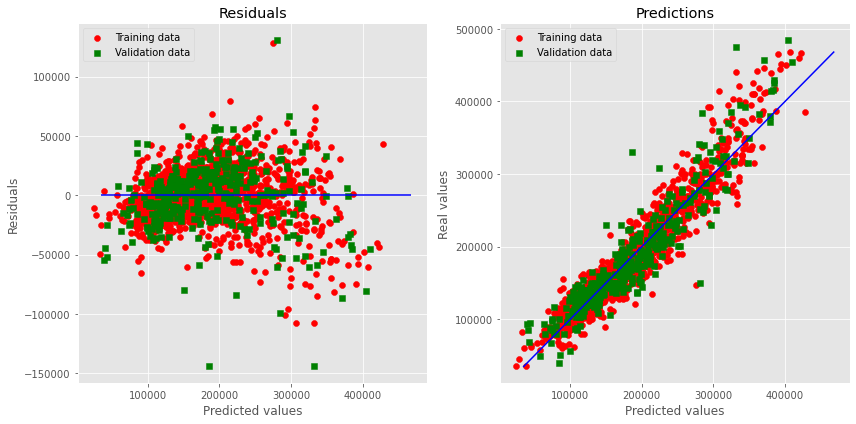

In [12]:
model_evaluation_plots(lr, X_train, y_train, X_test, y_test)

### 7.1.1 comments 
- Terrible result, models is severely overfitted resulting in a negative r2 value
- Will use Ridge, Lasso and Elastic model to regularize data

## 7.1.2 Ridge

In [13]:
ridge = RidgeCV(alphas = np.linspace(0.1,10,100))

In [14]:
ridge.fit(X_train, y_train);

In [15]:
ridge.alpha_

7.1

In [16]:
print("Train Score(L1): " + str(ridge.score(X_train,y_train)))
print("Test Score(L1): " + str(ridge.score(X_test,y_test)))
print('Test Data Estimated score(L1) ' + str(cross_val_score(ridge, X_train, y_train, cv = 5).mean()))

Train Score(L1): 0.8951240488796752
Test Score(L1): 0.8709675161571542
Test Data Estimated score(L1) 0.8755802132893523


In [17]:
print("Train RMSE(L1) " + str(np.sqrt(mean_squared_error(y_train, ridge.predict(X_train)))))
print('Test RMSE(L1) ' + str(np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))))
                              
print('Test Data Estimated RMSE(L1) ' + str(np.sqrt(-cross_val_score(ridge, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L1) 23096.76756516341
Test RMSE(L1) 28002.365869938807
Test Data Estimated RMSE(L1) 24887.591573501824


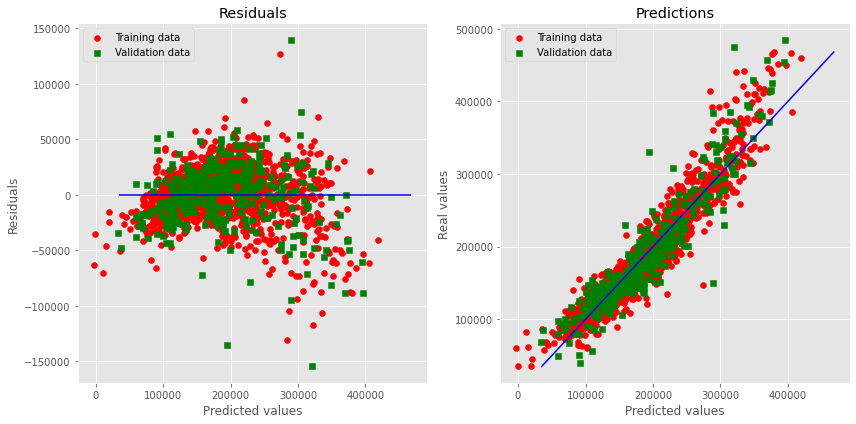

In [18]:
model_evaluation_plots(ridge, X_train, y_train, X_test, y_test)

Ridge model is producing better results

# 7.1.3 Lasso

In [19]:
lasso = LassoCV(alphas = np.linspace(0.1,10,100), max_iter = 3000)

In [20]:
lasso.fit(X_train, y_train);

C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122388799966.02222, tolerance: 615314000.130717
  tol, rng, random, positive)
C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136654119471.2063, tolerance: 652717550.9478595
  tol, rng, random, positive)
C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57923814438.67499, tolerance: 574941292.7813863
  tol, rng, random, positive)
C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You 

In [21]:
lasso.alpha_

10.0

In [22]:
print("Train Score(L2): " + str(lasso.score(X_train,y_train)))
print("Test Score(L2): " + str(lasso.score(X_test,y_test)))
print('Test Data Estimated score(L2) ' + str(cross_val_score(lasso, X_train, y_train, cv = 5).mean()))

Train Score(L2): 0.8983582672671415
Test Score(L2): 0.8692947518004898


C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1402050012.8674927, tolerance: 512865635.22303194
  tol, rng, random, positive)
C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110236713818.42068, tolerance: 512865635.22303194
  tol, rng, random, positive)
C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43261425797.637695, tolerance: 475295241.0169097
  tol, rng, random, positive)
C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge.

Test Data Estimated score(L2) 0.8730215569282201


C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110289366558.29834, tolerance: 515515880.4741683
  tol, rng, random, positive)


In [23]:
print("Train RMSE(L2) " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))
print('Test RMSE(L2) ' + str(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))))
                              
print('Test Data Estimated RMSE(L2) ' + str(np.sqrt(-cross_val_score(lasso, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L2) 22737.84374262951
Test RMSE(L2) 28183.291333765985


C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1402050012.8674927, tolerance: 512865635.22303194
  tol, rng, random, positive)
C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110236713818.42068, tolerance: 512865635.22303194
  tol, rng, random, positive)
C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43261425797.637695, tolerance: 475295241.0169097
  tol, rng, random, positive)
C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge.

Test Data Estimated RMSE(L2) 25142.42698174157


C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110289366558.29834, tolerance: 515515880.4741683
  tol, rng, random, positive)


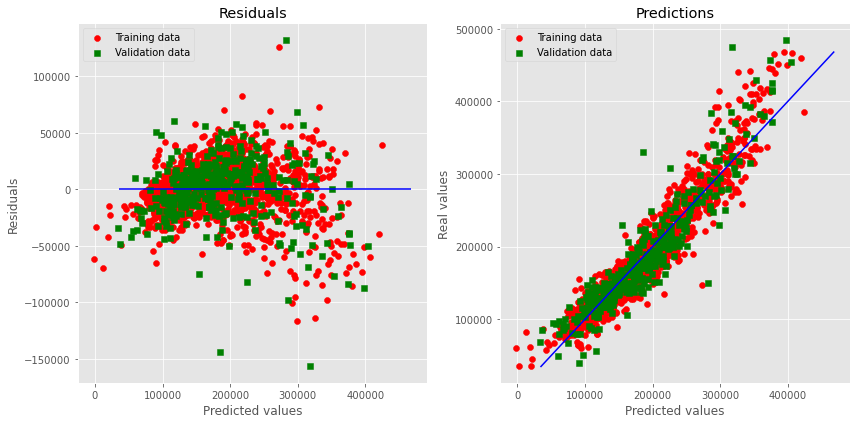

In [24]:
model_evaluation_plots(lasso, X_train, y_train, X_test, y_test)

# 7.1.4 Elastic Net

In [25]:
elasticnet = ElasticNetCV(alphas = np.linspace(0.1,10,100), max_iter = 1500)

In [26]:
elasticnet.fit(X_train, y_train);

In [27]:
elasticnet.alpha_

0.1

In [28]:
print("Train Score(EN): " + str(elasticnet.score(X_train,y_train)))
print("Test Score(EN): " + str(elasticnet.score(X_test,y_test)))
print('Test Data Estimated score(EN) ' + str(cross_val_score(elasticnet, X_train, y_train, cv = 5).mean()))

Train Score(EN): 0.880446408463348
Test Score(EN): 0.8619721584072435
Test Data Estimated score(EN) 0.8680513185523722


In [29]:
print("Train RMSE(EN) " + str(np.sqrt(mean_squared_error(y_train, elasticnet.predict(X_train)))))
print('Test RMSE(EN) ' + str(np.sqrt(mean_squared_error(y_test, elasticnet.predict(X_test)))))
                              
print('Test Data Estimated RMSE(EN) ' + str(np.sqrt(-cross_val_score(elasticnet, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(EN) 24660.08455020766
Test RMSE(EN) 28961.999742114473
Test Data Estimated RMSE(EN) 25649.266800694375


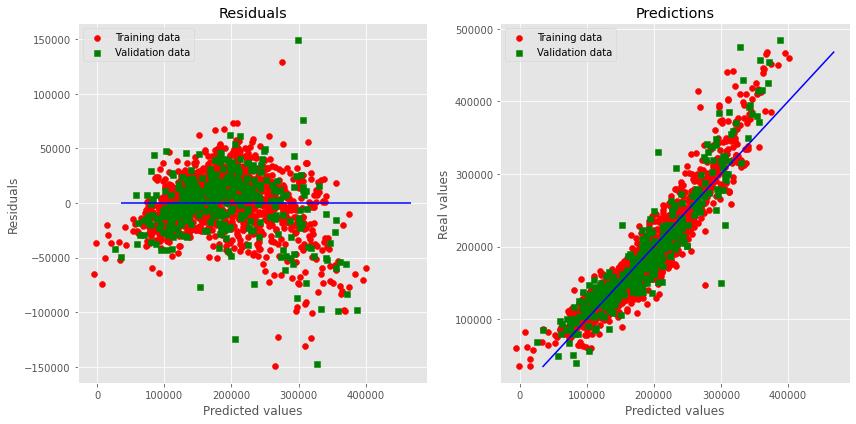

In [30]:
model_evaluation_plots(elasticnet, X_train, y_train, X_test, y_test)

- Slight differences from the 3 models
- Lasso does slightly better for its scoring
- will use Lasso model to eliminate features

# 8 Model Tuning

In [31]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
coef.sort_values(ascending = False, inplace = True)
coef[coef > 0]

Neighborhood_NridgHt     47332.770172
Neighborhood_NoRidge     38439.147736
Neighborhood_BrDale      37863.673861
Neighborhood_StoneBr     36269.108667
Exterior 1st_BrkFace     26486.266721
Condition 2_PosN         24188.364694
Bldg Type_1Fam           23226.031219
Neighborhood_Veenker     19107.678480
Exterior 2nd_CmentBd     18193.641720
Neighborhood_ClearCr     18028.614633
Land Contour_HLS         18010.350031
Neighborhood_NPkVill     15149.329189
House Style_2.5Unf       14280.824368
Condition 1_PosN         14266.303552
Neighborhood_MeadowV     14083.429893
Neighborhood_Somerst     13968.944526
Gr Liv Area              13895.299851
Neighborhood_Crawfor     13162.544196
Condition 1_PosA         11246.968508
Street_Grvl              11184.070394
MS Zoning_RH             11158.681265
1st Flr SF               10871.405291
Bldg Type_2fmCon          9912.721772
Total Bath                9641.894465
Exterior 1st_CBlock       9201.454870
Exterior 2nd_AsphShn      8677.059911
Land Contour

In [32]:
gd_coef = coef[:50].keys()
len(gd_coef) #keeping values with high coef

50

In [33]:
X_train_filtered = X_train[gd_coef]
X_test_filtered = X_test[gd_coef]

In [34]:
lr = LinearRegression()
lr.fit(X_train_filtered, y_train)

LinearRegression()

In [35]:
print("Train Score(Lr): " + str(lr.score(X_train_filtered,y_train)))
print("Test Score(Lr): " + str(lr.score(X_test_filtered,y_test)))
print('Test Data Estimated score(Lr) ' + str(cross_val_score(lr, X_train_filtered, y_train, cv = 5).mean()))

Train Score(Lr): 0.8911933976864508
Test Score(Lr): 0.8599283880779767
Test Data Estimated score(Lr) 0.8748594357236115


In [36]:
print("Train RMSE(Lr) " + str(np.sqrt(mean_squared_error(y_train, lr.predict(X_train_filtered)))))
print('Test RMSE(Lr) ' + str(np.sqrt(mean_squared_error(y_test, lr.predict(X_test_filtered)))))
                              
print('Test Data Estimated RMSE(Lr) ' + str(np.sqrt(-cross_val_score(lr, X_train_filtered, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(Lr) 23525.608856284187
Test RMSE(Lr) 29175.631174956947
Test Data Estimated RMSE(Lr) 24966.424327035158


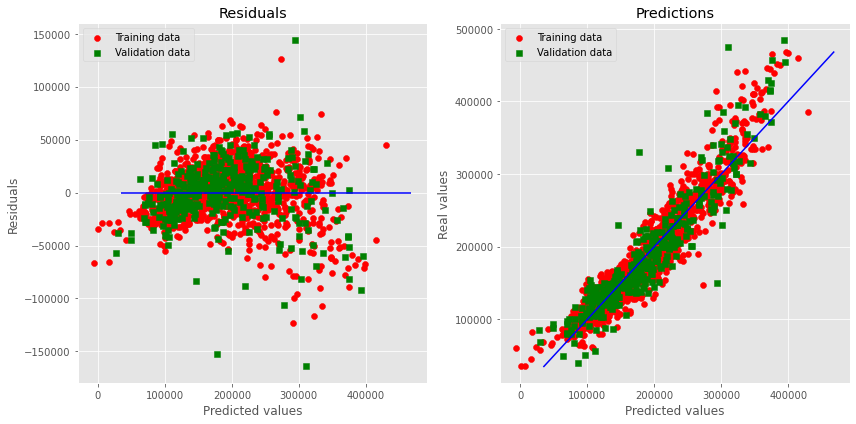

In [37]:
model_evaluation_plots(lr, X_train_filtered, y_train, X_test_filtered, y_test)

- Tried with 25, 30, 40, 50, 55 features for test, 50 features returns the best results
- Still not doing well on cross validation
- Trying with Lasso model

In [38]:
lasso = LassoCV(alphas = np.linspace(0.1,10,100), max_iter = 1500)

In [39]:
lasso.fit(X_train_filtered, y_train);

In [40]:
lasso.alpha_

10.0

In [41]:
print("Train Score(L2): " + str(lasso.score(X_train_filtered,y_train)))
print("Test Score(L2): " + str(lasso.score(X_test_filtered,y_test)))
print('Test Data Estimated score(L2) ' + str(cross_val_score(lasso, X_train_filtered, y_train, cv = 5).mean()))

Train Score(L2): 0.8910498398039454
Test Score(L2): 0.8609339314685795
Test Data Estimated score(L2) 0.8758698478483111


In [42]:
print("Train RMSE(L2) " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_filtered)))))
print('Test RMSE(L2) ' + str(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_filtered)))))
                              
print('Test Data Estimated RMSE(L2) ' + str(np.sqrt(-cross_val_score(lasso, X_train_filtered, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L2) 23541.123417296978
Test RMSE(L2) 29070.71982227407
Test Data Estimated RMSE(L2) 24875.63642975229


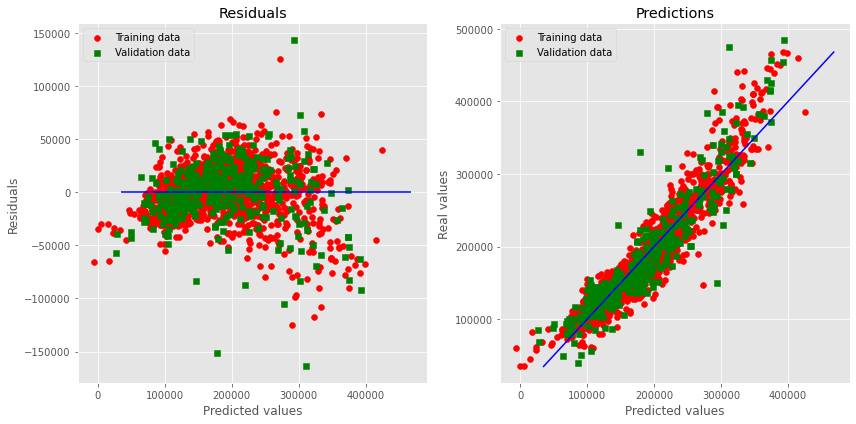

In [43]:
model_evaluation_plots(lasso, X_train_filtered, y_train, X_test_filtered, y_test)

# 8.1 Further Model tuning

- Polynomial features, try to reduce RMSE
- try to remove more values, reducing variance

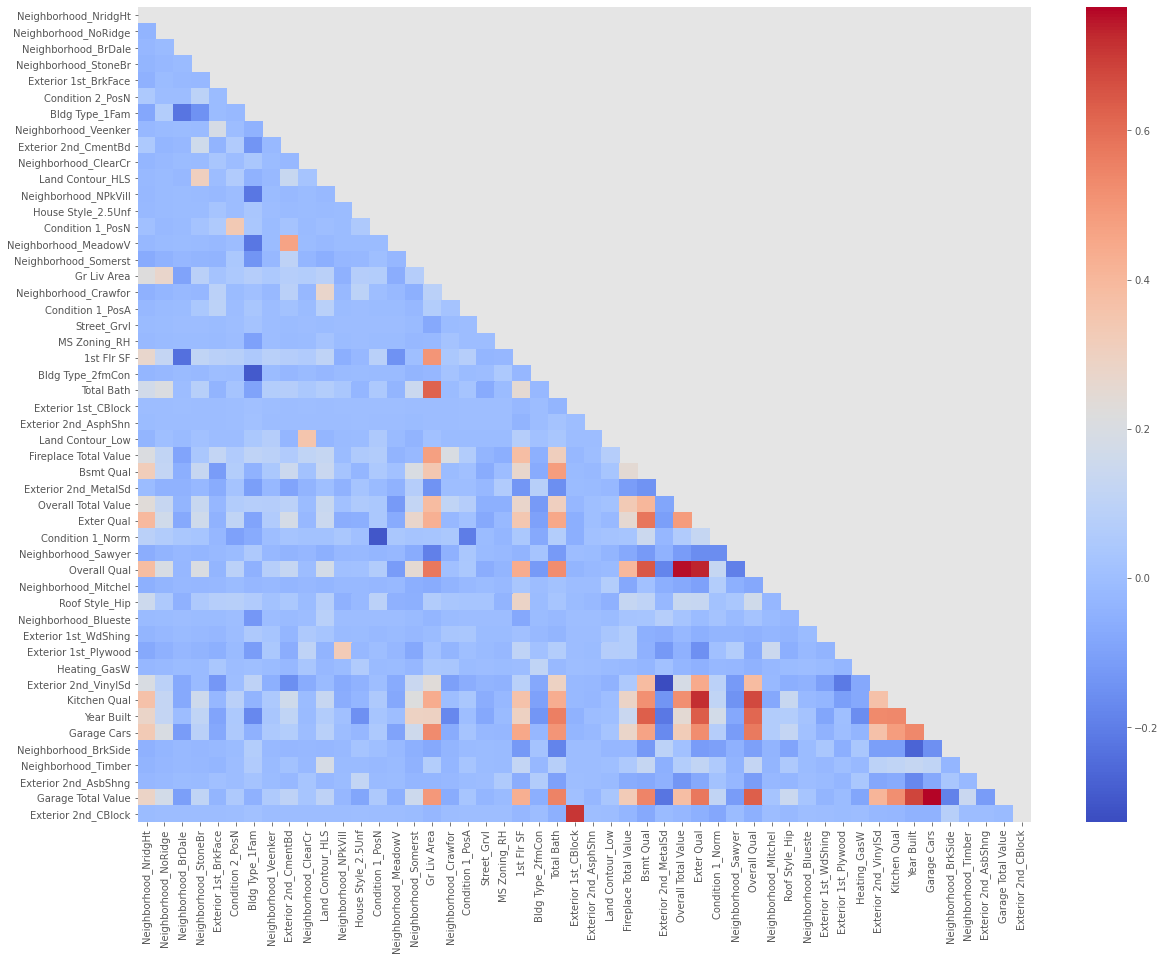

In [44]:
coef_sort = [i for i in gd_coef]
plt.figure(figsize= (20, 15))
mask = (np.triu(np.ones_like(df_train[coef_sort].corr(),
                             dtype=np.bool)))
sns.heatmap(df_train[coef_sort].corr(),
            annot=False, mask = mask, 
            fmt='.1g', cmap='coolwarm');

Very few patches of data with Correlation to each other, will plot out small heatmap to see

# 8.2 PolynomialFeatures

## 8.2.1 Garage related features with high coef

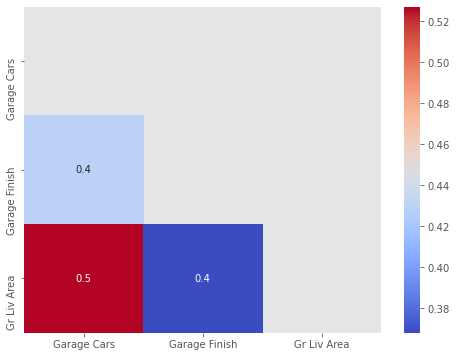

In [45]:
garage_coef = ['Garage Cars', 
               'Garage Finish', 'Gr Liv Area']
plt.figure(figsize= (8, 6))
mask = (np.triu(np.ones_like(df_train[garage_coef].corr(),
                             dtype=np.bool)))
sns.heatmap(df_train[garage_coef].corr(),
            annot=True, mask = mask, 
            fmt='.1g', cmap='coolwarm');

In [46]:
y = df_train['SalePrice']
X = df_train[garage_coef]

In [47]:
print("Garage Features Train Score(L2): " + str(cross_val_score(lasso, X = X, y = y, cv = 5).mean()))

Garage Features Train Score(L2): 0.6513719017417792


In [48]:
poly = PolynomialFeatures(include_bias=False)

In [49]:
X_poly = poly.fit_transform(X)

In [50]:
pd.DataFrame(X_poly, columns=poly.get_feature_names(garage_coef));

In [51]:
print("Polynomial Garage Features Train Score(L2): " + str(cross_val_score(lasso, X_poly, y, cv=5).mean()))

Polynomial Garage Features Train Score(L2): 0.7079454999659195


##  8.2.4 Adding in relevant Polynomial features to training and testing dataset

### 8.2.4 Creating Polynomial Features

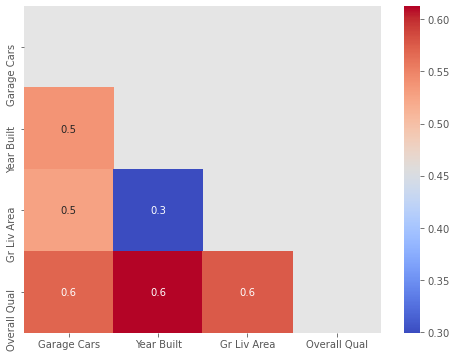

In [52]:
poly_coef = ['Garage Cars','Year Built','Gr Liv Area','Overall Qual']
plt.figure(figsize= (8, 6))
mask = (np.triu(np.ones_like(df_train[poly_coef].corr(),
                             dtype=np.bool)))
sns.heatmap(df_train[poly_coef].corr(),
            annot=True, mask = mask, 
            fmt='.1g', cmap='coolwarm');

In [53]:
y = df_train['SalePrice']
X = df_train[poly_coef]

In [54]:
print("Garage & Total & Year Features Train Score(L2): " + str(cross_val_score(lasso, X = X, y = y, cv = 5).mean()))

Garage & Total & Year Features Train Score(L2): 0.7646118274724748


In [55]:
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias=False)

In [56]:
X_poly = poly.fit_transform(X)

In [57]:
print("Polynomial Garage & Total & Year Features Train Score(L2): " + str(cross_val_score(lasso, X_poly, y, cv=5).mean()))

Polynomial Garage & Total & Year Features Train Score(L2): 0.8234191146384695


### 8.2.4 adding into training dataset

In [58]:
poly_features = pd.DataFrame(X_poly, columns=poly.get_feature_names(poly_coef))
poly_features.drop(poly_coef, axis = 1, inplace = True)
poly_features.shape

(1910, 6)

In [59]:
poly_features.columns

Index(['Garage Cars Year Built', 'Garage Cars Gr Liv Area', 'Garage Cars Overall Qual', 'Year Built Gr Liv Area', 'Year Built Overall Qual', 'Gr Liv Area Overall Qual'], dtype='object')

In [60]:
df_train_poly = pd.concat([df_train, poly_features], axis = 1)
df_train_poly.shape

(1910, 155)

# 8.3 Testing Polynomial features with Lasso

In [61]:
col_keys = df_train_poly.drop(columns = ['Id','SalePrice']).keys()
col_keys

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Exter Qual', 'Bsmt Qual', 'Central Air', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual',
       ...
       'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd', 'Garage Cars Year Built', 'Garage Cars Gr Liv Area', 'Garage Cars Overall Qual', 'Year Built Gr Liv Area', 'Year Built Overall Qual', 'Gr Liv Area Overall Qual'], dtype='object', length=153)

In [62]:
y = df_train_poly['SalePrice']
X = df_train_poly[col_keys]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.2)

In [64]:
print('X_train shape: ' + str(X_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: ' + str(y_test.shape))

X_train shape: (1528, 153)
X_test shape: (382, 153)
y_train shape: (1528,)
y_test shape: (382,)


In [65]:
lasso = LassoCV(alphas = np.linspace(0.1,10,100), max_iter = 2000)
lasso.fit(X_train, y_train);
lasso.alpha_

10.0

In [66]:
print("Train Score(L2): " + str(lasso.score(X_train,y_train)))
print("Test Score(L2): " + str(lasso.score(X_test,y_test)))
print('Test Data Estimated score(L2) ' + str(cross_val_score(lasso, X_train, y_train, cv = 5).mean()))

Train Score(L2): 0.9187901536140942
Test Score(L2): 0.8948601862871076
Test Data Estimated score(L2) 0.8985293459656492


In [67]:
print("Train RMSE(L2) " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))
print('Test RMSE(L2) ' + str(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))))
                              
print('Test Data Estimated RMSE(L2) ' + str(np.sqrt(-cross_val_score(lasso, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L2) 20324.39337905797
Test RMSE(L2) 25277.190329092464
Test Data Estimated RMSE(L2) 22402.118441634982


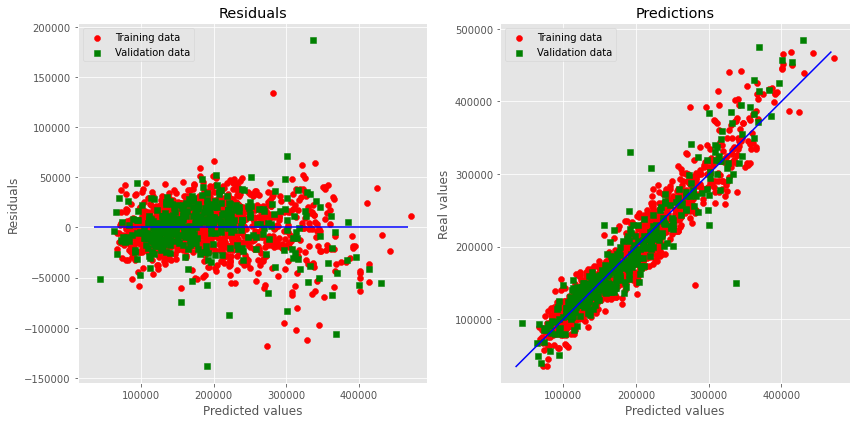

In [68]:
model_evaluation_plots(lasso, X_train, y_train, X_test, y_test)

### 8.3 comments :
- Results improved after inserting polynomial features

# 8.4  Lasso and Ridge Model after removing low coef columns

- filtering out top coefficients features

In [69]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
coef.sort_values(ascending = False, inplace = True) # sort value by importance of value

In [70]:
coef_sort = [i for i in (coef[:50].keys().sort_values())] # creating list in alphabetical order to see relationship

## 8.4.1 Lasso model

In [71]:
y = df_train_poly['SalePrice']
X = df_train_poly[coef_sort]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.2)

In [73]:
print('X_train shape: ' + str(X_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: ' + str(y_test.shape))

X_train shape: (1528, 50)
X_test shape: (382, 50)
y_train shape: (1528,)
y_test shape: (382,)


In [74]:
re_lasso = LassoCV(alphas = np.linspace(0.1,10,100), max_iter = 3000)
re_lasso.fit(X_train, y_train);
re_lasso.alpha_

10.0

In [75]:
print("Train Score(L2): " + str(re_lasso.score(X_train,y_train)))
print("Test Score(L2): " + str(re_lasso.score(X_test,y_test)))
print('Test Data Estimated score(L2) ' + str(cross_val_score(re_lasso, X_train, y_train, cv = 5).mean()))

Train Score(L2): 0.9112243649021917
Test Score(L2): 0.884399752135334
Test Data Estimated score(L2) 0.898890301907129


In [76]:
print("Train RMSE(L2) " + str(np.sqrt(mean_squared_error(y_train, re_lasso.predict(X_train)))))
print('Test RMSE(L2) ' + str(np.sqrt(mean_squared_error(y_test, re_lasso.predict(X_test)))))
                              
print('Test Data Estimated RMSE(L2) ' + str(np.sqrt(-cross_val_score(re_lasso, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L2) 21250.05906692392
Test RMSE(L2) 26504.80293656521
Test Data Estimated RMSE(L2) 22364.30546593833


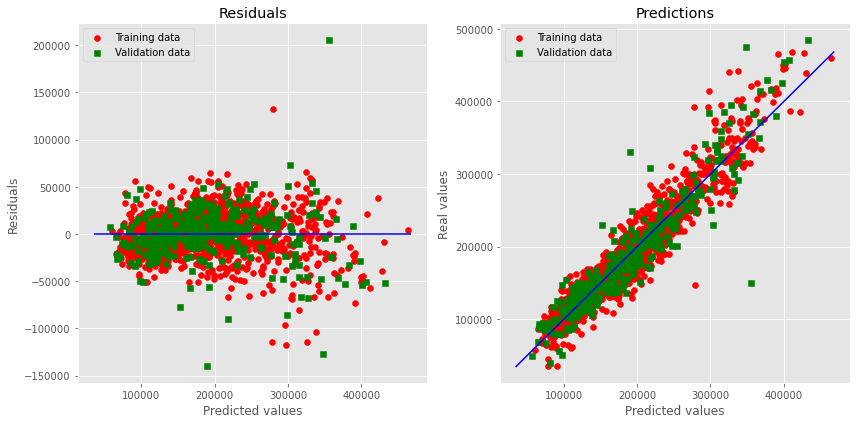

In [77]:
model_evaluation_plots(re_lasso, X_train, y_train, X_test, y_test)

## 8.4.2 Ridge Model

In [78]:
re_ridge = RidgeCV(alphas = np.linspace(0.1,10,100))

In [79]:
re_ridge.fit(X_train, y_train);

In [80]:
re_ridge.alpha_

5.0

In [81]:
print("Train Score(L1): " + str(re_ridge.score(X_train,y_train)))
print("Test Score(L1): " + str(re_ridge.score(X_test,y_test)))
print('Test Data Estimated score(L1) ' + str(cross_val_score(re_ridge, X_train, y_train, cv = 5).mean()))

Train Score(L1): 0.910522226475336
Test Score(L1): 0.885125949670058
Test Data Estimated score(L1) 0.9001179112020775


In [82]:
print("Train RMSE(L1) " + str(np.sqrt(mean_squared_error(y_train, re_ridge.predict(X_train)))))
print('Test RMSE(L1) ' + str(np.sqrt(mean_squared_error(y_test, re_ridge.predict(X_test)))))
                              
print('Test Data Estimated RMSE(L1) ' + str(np.sqrt(-cross_val_score(re_ridge, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L1) 21333.928346458353
Test RMSE(L1) 26421.420562208023
Test Data Estimated RMSE(L1) 22221.2698509161


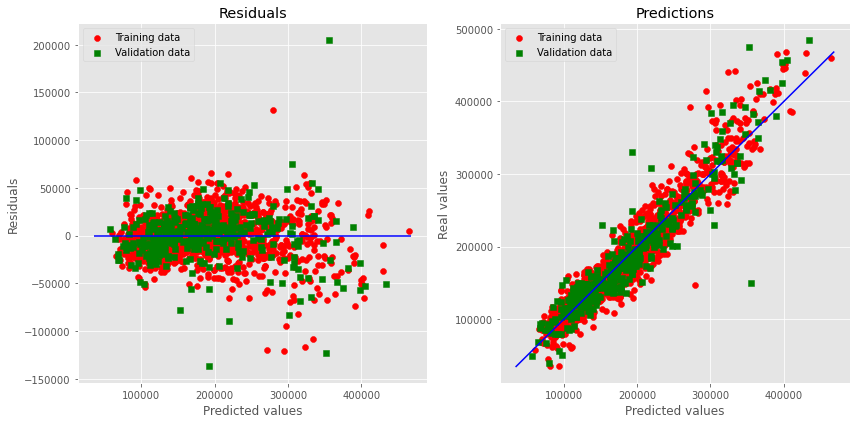

In [83]:
model_evaluation_plots(re_ridge, X_train, y_train, X_test, y_test)

# 8.4 comments
- Results between Ridge and Lasso models do not differ much

# Kaggle Submission

- will submit final prediction of lasso and ridge models to Kaggle

# Preparing Test Data

In [84]:
# importing data for unknown test data prediction
df_test= pd.read_csv('../datasets/test_preprocess.csv')

df_test.shape

(879, 143)

In [85]:
# in test - train
df_test_col = df_test.columns.difference(df_train.columns)

# in train not in test
df_train_col =  df_train.columns.difference(df_test.columns)

# dropping values not in training set
df_test.drop(columns = df_test_col, inplace = True)

# adding values in training set not in testing set
for i in df_train_col:
    df_test[i] = 0
    
#filling in possible null values    
df_test.fillna(0 ,inplace = True)

#Creating Polynomial Features for unknown data
X_df_test = df_test[poly_coef]
X_test_poly = poly.fit_transform(X_df_test)

#Creating Polynomial Dataframe to add into test data
poly_test_features = pd.DataFrame(X_test_poly, columns=poly.get_feature_names(poly_coef))
poly_test_features.drop(poly_coef, axis = 1, inplace = True)

#adding features together for prediction models
df_test_poly = pd.concat([df_test, poly_test_features], axis = 1)


# Predicting Saleprice of unknown test data

In [86]:
X_df_test = df_test_poly[coef_sort]

In [87]:
lasso_test_predict = re_lasso.predict(X_df_test)
ridge_test_predict = re_ridge.predict(X_df_test)

In [88]:
print(len(lasso_test_predict))
print(len(ridge_test_predict))

879
879


In [89]:
df_lasso_predicted = pd.DataFrame(lasso_test_predict, columns = ['SalePrice'])
df_ridge_predicted = pd.DataFrame(ridge_test_predict, columns = ['SalePrice'])

In [90]:
print(df_lasso_predicted.head())
print(df_ridge_predicted.head())

       SalePrice
0  114471.666104
1  163899.023083
2  196656.223365
3  113297.045559
4  183864.744263
       SalePrice
0  113593.743021
1  166370.816206
2  197470.281661
3  113920.181182
4  185157.707119


In [91]:
submit_lasso = pd.concat([df_test['Id'], df_lasso_predicted['SalePrice']], 
                   ignore_index=False, sort=False, axis = 1)

submit_ridge = pd.concat([df_test['Id'], df_ridge_predicted['SalePrice']], 
                   ignore_index=False, sort=False, axis = 1)


In [92]:
submit_lasso.sort_values('Id', ascending = True, inplace = True)
submit_lasso.head()

,Id,SalePrice
704,2,113347.158075
706,4,288689.529400
120,6,187183.198711
312,7,228523.397212
401,17,214290.110622


In [93]:
submit_ridge.sort_values('Id', ascending = True, inplace = True)
submit_ridge.head()

,Id,SalePrice
704,2,111418.218397
706,4,288988.309078
120,6,187324.322483
312,7,224961.833838
401,17,215774.864479


In [94]:
submit_lasso.to_csv("../datasets/submission_lasso.csv", index=False)
submit_ridge.to_csv("../datasets/submission_ridge.csv", index=False)

# Submission result

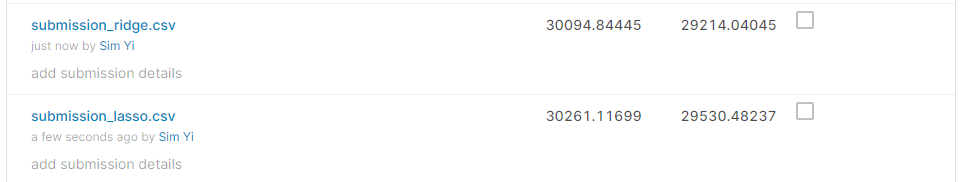

# 9. Analysis

In [95]:
positive_features = coef[:50].sort_values(ascending = False)

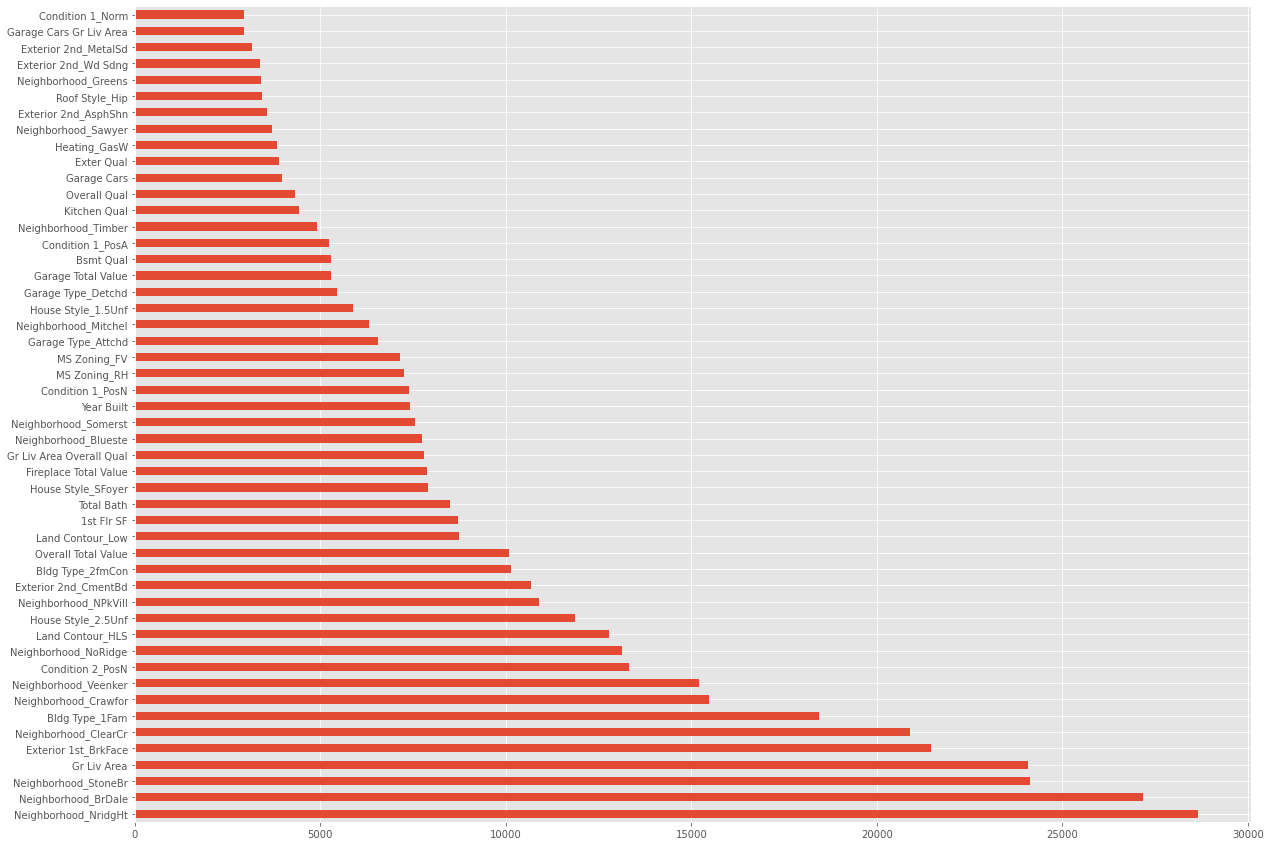

In [96]:
#looking at which features affect saleprice the most
plt.figure(figsize= (20, 15))
coef[:50].plot(kind = 'barh');

# 9 comments 
- From a glance, it looks like the location where the house is built matters the most for saleprice
  - Greenhill, Northridge Heights and Crawford seems to affect salesprice the most
  - Condition of the house (Proximity to main road or railroad), where it is near to main and railroad on both conditions seems to improve saleprice
  
- Above grade (ground) living area square feet matters too, as bigger the living area the higher the price
- Having a Garage improves Saleprice
- Building type: 1Fam Single-family Detached, 2FmCon Two-family Conversion improved saleprice
- Total Bsmt SF, the more basement space the better!


In [97]:
def Diff(li1, li2): 
    return (list(set(li1) - set(li2)))

In [98]:
positive_features = coef[:50].sort_values(ascending = False)

In [99]:
coef_list = [i for i in (positive_features.keys().sort_values())] # creating list in alphabetical order to see relationship

In [100]:
coef_list[:] = [x for x in coef_list if 'Neigh' not in x]

In [101]:
coef_list[:] = [x for x in coef_list if 'Condition' not in x]

In [102]:
coef_list[:] = [x for x in coef_list if 'Land' not in x]

In [103]:
sorted(Diff(coef_list,poly_test_features.columns))

['1st Flr SF',
 'Bldg Type_1Fam',
 'Bldg Type_2fmCon',
 'Bsmt Qual',
 'Exter Qual',
 'Exterior 1st_BrkFace',
 'Exterior 2nd_AsphShn',
 'Exterior 2nd_CmentBd',
 'Exterior 2nd_MetalSd',
 'Exterior 2nd_Wd Sdng',
 'Fireplace Total Value',
 'Garage Cars',
 'Garage Total Value',
 'Garage Type_Attchd',
 'Garage Type_Detchd',
 'Gr Liv Area',
 'Heating_GasW',
 'House Style_1.5Unf',
 'House Style_2.5Unf',
 'House Style_SFoyer',
 'Kitchen Qual',
 'MS Zoning_FV',
 'MS Zoning_RH',
 'Overall Qual',
 'Overall Total Value',
 'Roof Style_Hip',
 'Total Bath',
 'Year Built']

# 10 Recommendations:

The Newer the house the better, 
Big houses prices higher
